If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression because, as the name implies, linear regression presumes that the data is linear

## Importing required lib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

- Though Linear regression is very good to solve many problems, it cannot be used for all datasets.
- It models a linear relation between a dependent variable y and independent variable x. It had a simple equation, of degree 1, for example y = 2x + 3.

In [2]:
x = np.arange(-5.0, 5.0, 0.1)
y = 2 * x + 3
y_noise = 2 * np.random.normal(size=x.size)
y_data = y + y_noise

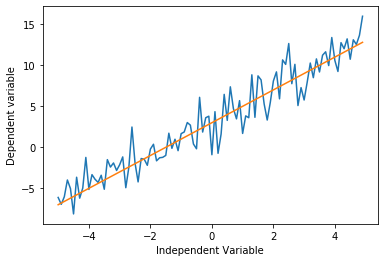

In [5]:
plt.figure()
plt.plot(x, y_data)
plt.plot(x, y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent variable')
plt.show()






































Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $$ y = \log(x)$$
    
Or even, more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

In [6]:
y_nl = (x ** 3) + (x ** 2) + x + 3
y_noise_nl = 20 * np.random.normal(size=x.size)
y_data_nl = y_nl + y_noise_nl

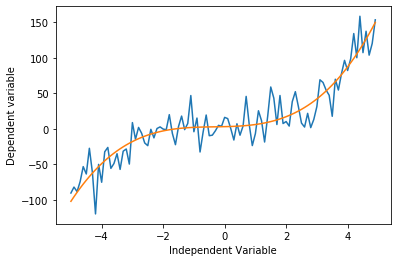

In [7]:
plt.figure()
plt.plot(x, y_data_nl)
plt.plot(x, y_nl)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent variable')
plt.show()

## Quadratic

$$ Y = X^2 $$

In [8]:
y_q = np.power(x, 2)
y_noise_q = 2 * np.random.normal(size=x.size)
y_data_q = y_q + y_noise_q

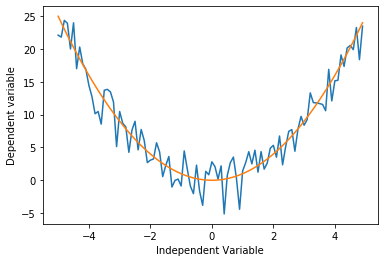

In [9]:
plt.figure()
plt.plot(x, y_data_q)
plt.plot(x, y_q)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent variable')
plt.show()

## Exponential

An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable. 


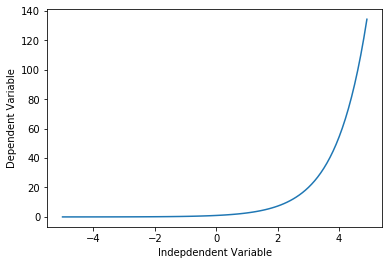

In [11]:
Y= np.exp(x)

plt.plot(x,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logarithmic

The response $y$ is a results of applying logarithmic map from input $x$'s to output variable $y$. It is one of the simplest form of __log()__: i.e. $$ y = \log(x)$$

Please consider that instead of $x$, we can use $X$, which can be polynomial representation of the $x$'s. In general form it would be written as  
\begin{equation}
y = \log(X)
\end{equation}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


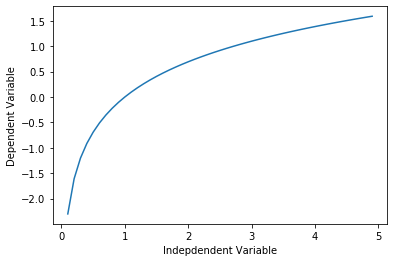

In [12]:
Y = np.log(x)

plt.plot(x,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## Sigmoid/ Logistic function

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

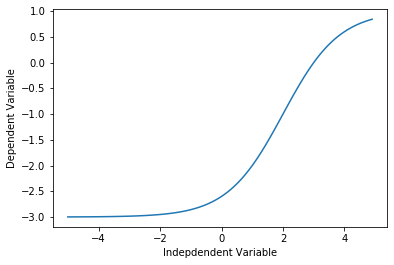

In [13]:
Y = 1-4/(1+np.power(3, x-2))

plt.plot(x,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Non_linear regression Example

In [14]:
import pandas as pd

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [17]:
df = pd.read_csv('china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


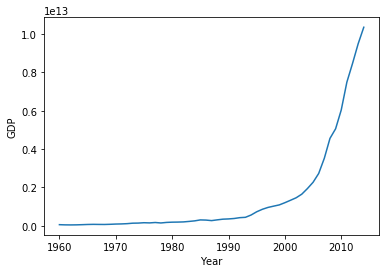

In [19]:
#plotting the dataset
plt.figure()
plt.plot(df.Year, df.Value)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

### Choosing a model ###

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

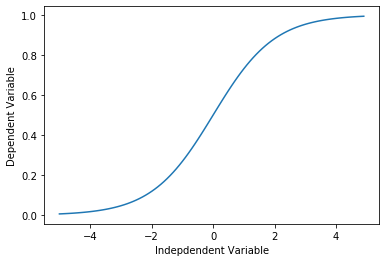

In [21]:
Y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [22]:
# Build the model as per our assumption
def sigmoid(x, beta1, beta2):
    y = 1.0 / (1 + np.exp(-beta1 * (x - beta2)))
    return y

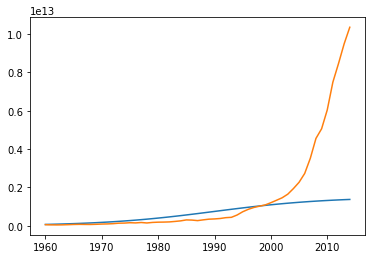

In [30]:
# define the params 
beta1 = 0.1 
beta2 = 1990.0

y_pred = sigmoid(df.Year, beta1, beta2)

plt.plot(df.Year, y_pred * 1500000000000.0)
plt.plot(df.Year, df.Value)

In [32]:
# Doesn't seem like we got the best pair, lets optimize
x_data = df.Year/max(df.Year)
y_data = df.Value/max(df.Value)

In [34]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_data, y_data)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


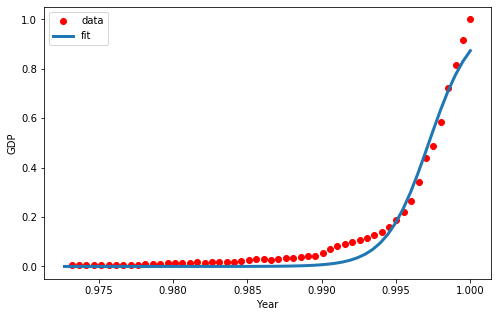

In [35]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [36]:
# now play with the real dataset
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
test = df[~mask]

In [37]:
x_train, y_train = train.Year, train.Value
x_test, y_test = test.Year, test.Value

In [38]:
popt, pcov = curve_fit(sigmoid, x_train, y_train)
y_pred = sigmoid(x_test, *popt)

C:\Users\MRUTYUNJAY BISWAL\AppData\Roaming\Python\Python37\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [39]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('MAE = %.2f' %mean_absolute_error(y_test, y_pred))
print('MSE = %.2f' %mean_squared_error(y_test, y_pred))
print('R2 Score = %.2f' %r2_score(y_test, y_pred))

MAE = 1010627962205.74
MSE = 2373724008051682177974272.00
R2 Score = -0.76
